## Importing Libraries

In [295]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import warnings

from math import floor
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('fivethirtyeight')

## Downloading Data

In [296]:
symbol='MSFT'
start='2016-01-01'
end='2024-01-01'
data=yf.download(symbol,start,end)
data.dropna()
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,48.698891,53778000
2016-01-05,54.930000,55.389999,54.540001,55.049999,48.921047,34079700
2016-01-06,54.320000,54.400002,53.639999,54.049999,48.032375,39518900
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.361702,56564900
2016-01-08,52.369999,53.279999,52.150002,52.330002,46.503880,48754000
...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100
2023-12-26,375.000000,376.940002,373.500000,374.660004,374.660004,12673100
2023-12-27,373.690002,375.059998,372.809998,374.070007,374.070007,14905400


## Calculating Daily Returns

In [297]:
data['returns']=data['Close'].diff()
data

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2016-01-04,54.320000,54.799999,53.389999,54.799999,48.698891,53778000,NaN
2016-01-05,54.930000,55.389999,54.540001,55.049999,48.921047,34079700,0.250000
2016-01-06,54.320000,54.400002,53.639999,54.049999,48.032375,39518900,-1.000000
2016-01-07,52.700001,53.490002,52.070000,52.169998,46.361702,56564900,-1.880001
2016-01-08,52.369999,53.279999,52.150002,52.330002,46.503880,48754000,0.160004
...,...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100,1.039978
2023-12-26,375.000000,376.940002,373.500000,374.660004,374.660004,12673100,0.080017
2023-12-27,373.690002,375.059998,372.809998,374.070007,374.070007,14905400,-0.589996


## Calculating Money Flow Index (MFI)

### The Money Flow Index (MFI) is a momentum indicator, assessing the strength and direction of money flow(MF) in a security. Calculated using typical price(TP) and volume, MFI indicates overbought or oversold conditions, aiding traders in identifying potential trend reversals and market momentum.

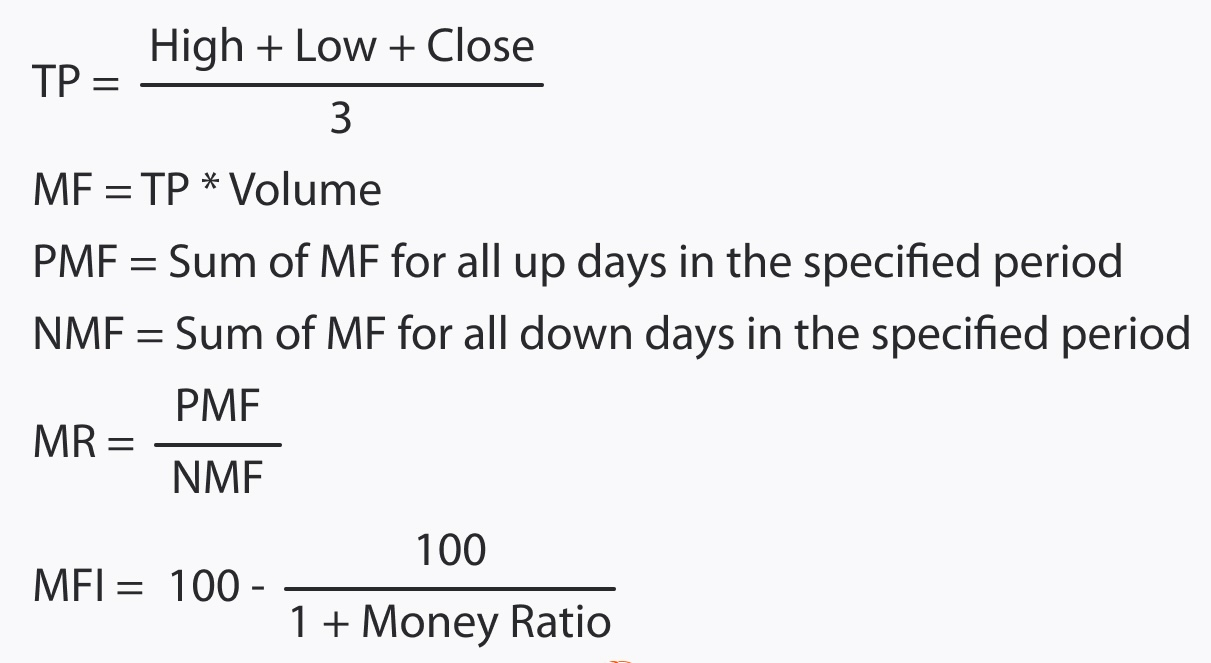

In [298]:
## Calculating MFI for 14 day period
period=14
typical_price = (data['High']+ data['Low']+ data['Close'])/3
money_flow=typical_price*data['Volume']
positive_flow=[]
negative_flow=[]

for i in range(1,len(typical_price)):
    if typical_price[i]>typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i]<typical_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else :
        positive_flow.append(0)
        negative_flow.append(0)
        
display(money_flow)

Date
2016-01-04    2.921759e+09
2016-01-05    1.874156e+09
2016-01-06    2.135206e+09
2016-01-07    2.973994e+09
2016-01-08    2.563810e+09
                  ...     
2023-12-22    6.394749e+09
2023-12-26    4.752835e+09
2023-12-27    5.574322e+09
2023-12-28    5.376923e+09
2023-12-29    7.031610e+09
Length: 2012, dtype: float64

In [299]:
positive_mf=[]
negative_mf=[]
for i in range(period-1,len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1-period:i+1]))
for i in range(period-1,len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period:i+1]))

## Calcuating MFI using the formula mentioned above

In [300]:
mfi=100*(np.array(positive_mf))/(np.array(positive_mf)+np.array(negative_mf)) 
data=data[14:]
data['MFI']=mfi
data

,Open,High,Low,Close,Adj Close,Volume,returns,MFI
Date,,,,,,,,
2016-01-25,51.939999,52.650002,51.650002,51.790001,46.024002,34707700,-0.500000,51.953977
2016-01-26,51.790001,52.439999,51.549999,52.169998,46.361702,28900800,0.379997,50.400249
2016-01-27,52.009998,52.200001,51.020000,51.220001,45.517471,36775200,-0.949997,50.946174
2016-01-28,51.860001,52.209999,51.250000,52.060001,46.263947,62513800,0.840000,56.895253
2016-01-29,54.730000,55.090000,54.000000,55.090000,48.956604,83611700,3.029999,57.231791
...,...,...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100,1.039978,76.725102
2023-12-26,375.000000,376.940002,373.500000,374.660004,374.660004,12673100,0.080017,75.873700
2023-12-27,373.690002,375.059998,372.809998,374.070007,374.070007,14905400,-0.589996,77.881544


## Plotting close price and MFI

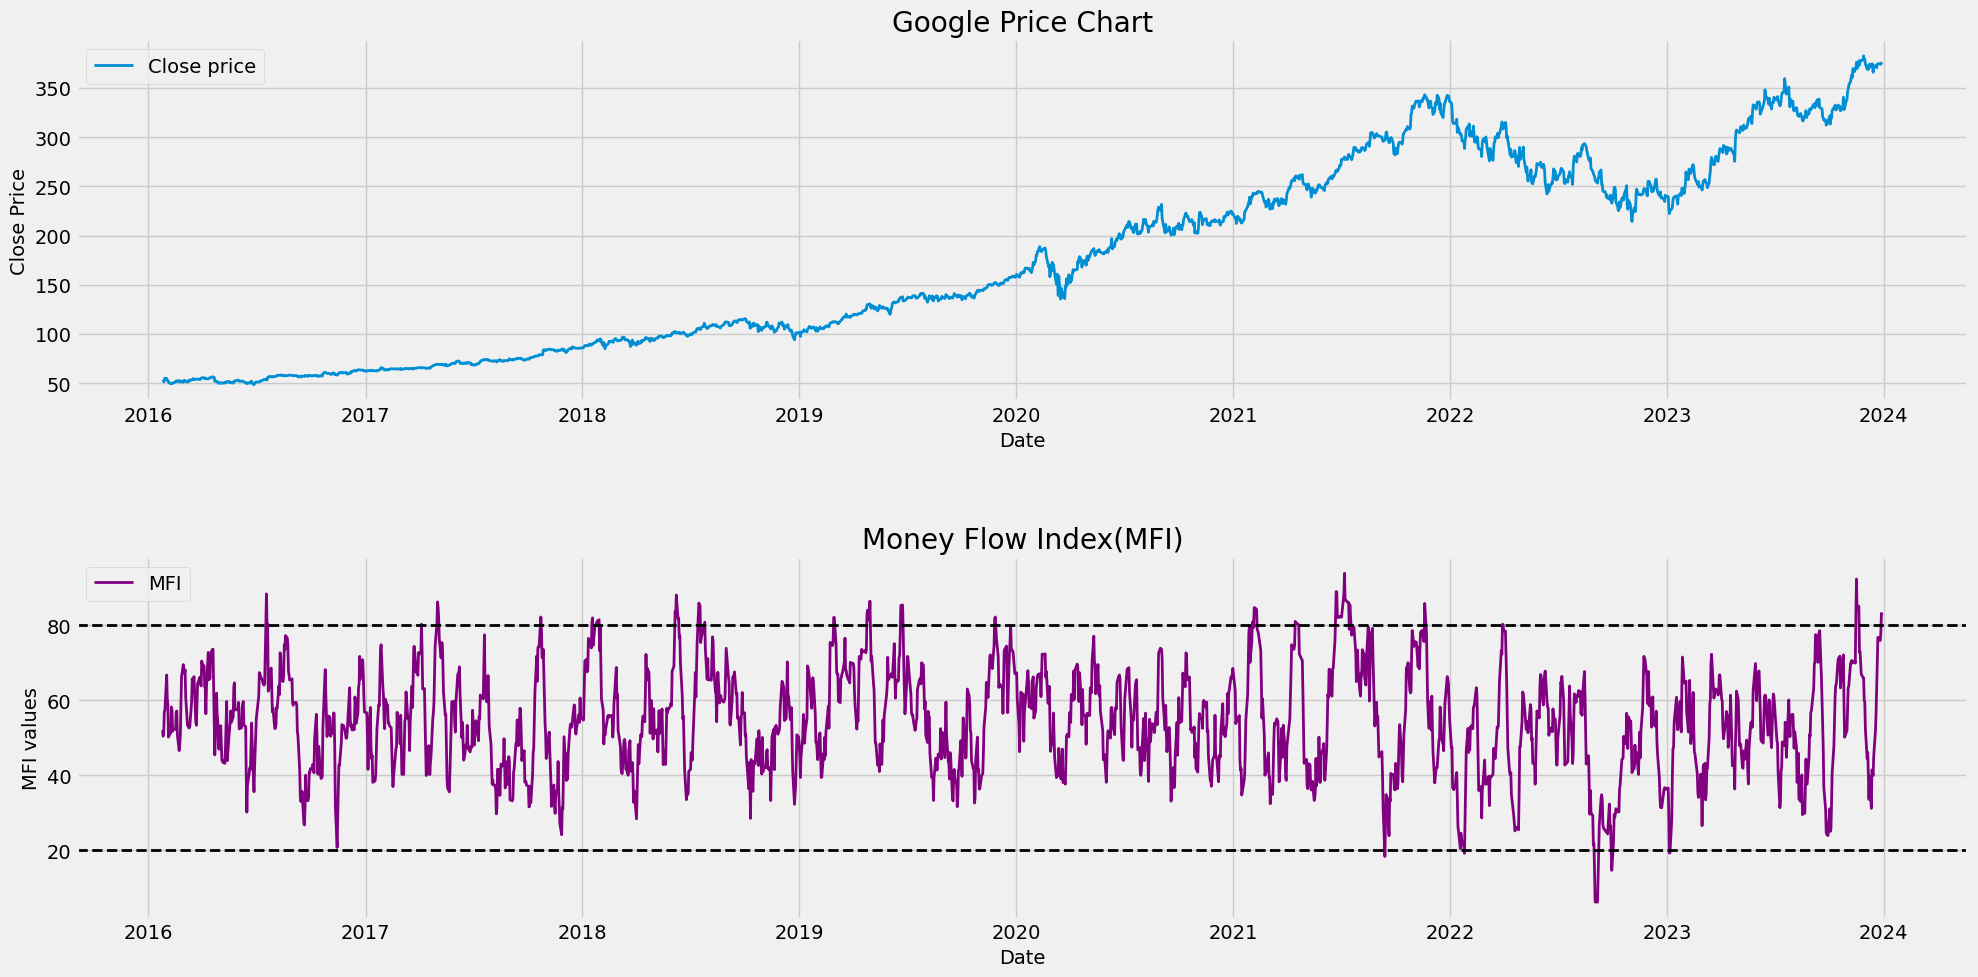

In [301]:
# Define position of 1st subplot
fig1=plt.subplot2grid((11,1), (0,0), rowspan = 5, colspan = 2)
plt.title('Google Price Chart')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(data['Close'], label='Close price', linewidth=2)
plt.legend()

# Define position of 2nd subplot
fig2= plt.subplot2grid((11,1), (6,0), rowspan = 5, colspan = 2)
plt.title('Money Flow Index(MFI)')
plt.xlabel('Date')
plt.ylabel('MFI values')

plt.plot(data['MFI'], 'm', label='MFI',linewidth=2, color='purple')
fig2.axhline(20, linewidth = 2, linestyle = '--', color = 'black')
fig2.axhline(80, linewidth = 2, linestyle = '--', color = 'black')
plt.legend()

plt.tight_layout()
plt.show()

## Defining trading strategy using MFI

### When the MFI value surpasses 80, the stock is considered overbought and should be sold. Conversely, if the MFI value falls below 20, the stock is considered oversold, and should be bought.

In [302]:
def strategy_mfi(close, mfi):
  mfi_signal = []
  position = 0
  for i in range(len(mfi)):
    if mfi[i] > 80:
      if position != -1:
       position = -1
       mfi_signal.append(position)

      else:
        mfi_signal.append(0)
    elif mfi[i] < 20:
       if position != 1:
            position = 1
            mfi_signal.append(position)
       else:
            mfi_signal.append(0)
    else:
      mfi_signal.append(0)
  return mfi_signal
data['mfi_signal']= strategy_mfi(data['Close'], data['MFI'])

## Computing Position and signals

In [303]:
data['trade_position']=[0]*len(data['mfi_signal'])

for i in range(len(data['Close'])):
  if data['mfi_signal'][i] == 1:
      data['trade_position'][i] = 1

  elif data['mfi_signal'][i] == -1:
      data['trade_position'][i] = 0

  else:
      data['trade_position'][i] = data['trade_position'][i-1]

frames = [data["Close"], data["MFI"], data['mfi_signal'], data['trade_position']]

strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy.dropna()
strategy.head()

,Close,MFI,mfi_signal,trade_position
Date,,,,
2016-01-25,51.790001,51.953977,0,0
2016-01-26,52.169998,50.400249,0,0
2016-01-27,51.220001,50.946174,0,0
2016-01-28,52.060001,56.895253,0,0
2016-01-29,55.090000,57.231791,0,0


## Backtesting

In [304]:
data['strategy_returns']=data['returns'] * (data['trade_position'])
data

,Open,High,Low,Close,Adj Close,Volume,returns,MFI,mfi_signal,trade_position,strategy_returns
Date,,,,,,,,,,,
2016-01-25,51.939999,52.650002,51.650002,51.790001,46.024002,34707700,-0.500000,51.953977,0,0,-0.0
2016-01-26,51.790001,52.439999,51.549999,52.169998,46.361702,28900800,0.379997,50.400249,0,0,0.0
2016-01-27,52.009998,52.200001,51.020000,51.220001,45.517471,36775200,-0.949997,50.946174,0,0,-0.0
2016-01-28,51.860001,52.209999,51.250000,52.060001,46.263947,62513800,0.840000,56.895253,0,0,0.0
2016-01-29,54.730000,55.090000,54.000000,55.090000,48.956604,83611700,3.029999,57.231791,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,373.679993,375.179993,372.709991,374.579987,374.579987,17091100,1.039978,76.725102,0,0,0.0
2023-12-26,375.000000,376.940002,373.500000,374.660004,374.660004,12673100,0.080017,75.873700,0,0,0.0
2023-12-27,373.690002,375.059998,372.809998,374.070007,374.070007,14905400,-0.589996,77.881544,0,0,-0.0


In [305]:
Netreturns=data['strategy_returns'].cumsum()[-1]
print("Net returns for the given strategy:",Netreturns,"%")

Net returns for the given strategy: 173.39999389648438 %


## Calculating CAGR

In [306]:
cagr=100*((1+(Netreturns/100))**(0.125)-1)
print("Cagr for the given strategy:",cagr,"%")

Cagr for the given strategy: 13.396542395040068 %
